# Experiment 8: Support Vector Machines (SVMs) and the Kernel Trick

## Total Marks: 100

### Learning Objectives:
- Understand core concepts of SVMs including maximal margin hyperplane and support vectors
- Implement the kernel trick for non-linear classification problems
- Compare different SVM kernels (Linear, Polynomial, RBF)
- Tune hyperparameters using GridSearchCV
- Visualize 2D decision boundaries
- Evaluate performance on hold-out test set

## Import Required Libraries

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


---
## Task 1: Data Loading and Preprocessing (10 Marks)

### Step 1.1: Generate the Moons Dataset

Dataset shape: (500, 2)
Number of samples: 500
Number of features: 2
Class distribution: [250 250]


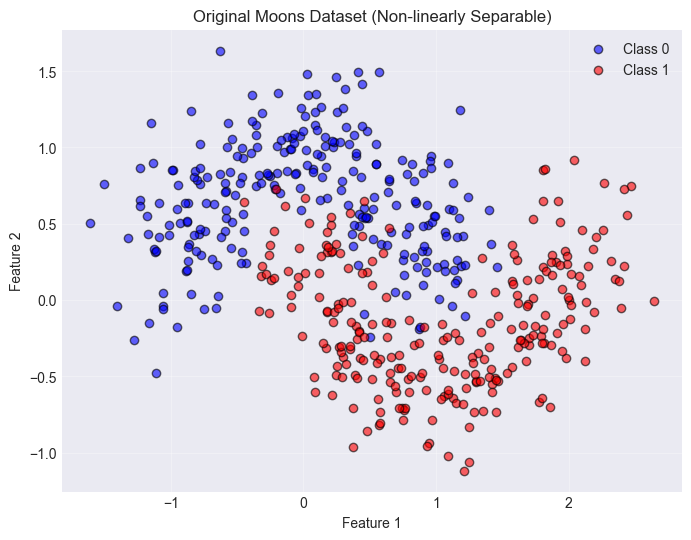

In [2]:
# Generate 500 samples with noise to make it challenging
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Class distribution: {np.bincount(y)}")

# Visualize the raw dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Moons Dataset (Non-linearly Separable)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Step 1.2: Create Hold-Out Set (70/30 Split)

In [3]:
# Perform 70/30 train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Validation class distribution: {np.bincount(y_val)}")

Training set size: 350 samples
Validation set size: 150 samples
Training class distribution: [175 175]
Validation class distribution: [75 75]


### Step 1.3: Standardize Features

In [4]:
# Initialize and fit the StandardScaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Feature Standardization Complete!")
print(f"\nTraining set - Mean: {X_train_scaled.mean(axis=0)}")
print(f"Training set - Std: {X_train_scaled.std(axis=0)}")
print(f"\nValidation set - Mean: {X_val_scaled.mean(axis=0)}")
print(f"Validation set - Std: {X_val_scaled.std(axis=0)}")

Feature Standardization Complete!

Training set - Mean: [-8.60422844e-17 -1.49087092e-17]
Training set - Std: [1. 1.]

Validation set - Mean: [0.07921986 0.03162808]
Validation set - Std: [1.07581174 0.91798876]


---
## Task 2: Model 1 - The (Failing) Linear SVM (15 Marks)

### Step 2.1: Train Linear SVM

In [5]:
# Instantiate and train linear SVM
linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)

print("Linear SVM trained successfully!")
print(f"Number of support vectors: {linear_model.n_support_}")
print(f"Total support vectors: {sum(linear_model.n_support_)}")

Linear SVM trained successfully!
Number of support vectors: [56 57]
Total support vectors: 113


### Step 2.2: Evaluate Linear SVM

In [6]:
# Make predictions on validation set
y_pred_linear = linear_model.predict(X_val_scaled)

# Calculate accuracy
linear_accuracy = accuracy_score(y_val, y_pred_linear)

print("="*50)
print("LINEAR SVM PERFORMANCE")
print("="*50)
print(f"\nValidation Accuracy: {linear_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_linear))

LINEAR SVM PERFORMANCE

Validation Accuracy: 0.8400

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        75
           1       0.86      0.81      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



### Step 2.3: Analysis

**Why the accuracy is not perfect:**

The linear SVM fails to achieve perfect accuracy because the 'moons' dataset is **non-linearly separable**. A linear decision boundary (a straight line in 2D) cannot perfectly separate the two crescent-shaped classes. The data forms two interleaving half-circles, which requires a curved decision boundary.

**The C Parameter:**

- **C** is the regularization parameter that controls the trade-off between:
  - Maximizing the margin (distance between decision boundary and closest points)
  - Minimizing classification errors on the training data
  
- **Large C** (e.g., 100): Model focuses on correctly classifying all training points, leading to a smaller margin and potential overfitting
- **Small C** (e.g., 0.01): Model focuses on maximizing the margin, allowing more misclassifications. This leads to:
  - A wider margin
  - More support vectors
  - Underfitting (too simple decision boundary)
  - Lower training accuracy but potentially better generalization

---
## Task 3: Model 2 & 3 - The Kernel Trick (25 Marks)

### Step 3.1: RBF Kernel Model

In [7]:
# Instantiate and train RBF SVM
rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rbf = rbf_model.predict(X_val_scaled)
rbf_accuracy = accuracy_score(y_val, y_pred_rbf)

print("="*50)
print("RBF KERNEL SVM PERFORMANCE")
print("="*50)
print(f"\nValidation Accuracy: {rbf_accuracy:.4f}")
print(f"Number of support vectors: {rbf_model.n_support_}")
print(f"Total support vectors: {sum(rbf_model.n_support_)}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rbf))

RBF KERNEL SVM PERFORMANCE

Validation Accuracy: 0.9467
Number of support vectors: [50 49]
Total support vectors: 99

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.97      0.92      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



### Step 3.2: Polynomial Kernel Model

In [8]:
# Instantiate and train Polynomial SVM
poly_model = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
poly_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_val_scaled)
poly_accuracy = accuracy_score(y_val, y_pred_poly)

print("="*50)
print("POLYNOMIAL KERNEL SVM PERFORMANCE")
print("="*50)
print(f"\nValidation Accuracy: {poly_accuracy:.4f}")
print(f"Number of support vectors: {poly_model.n_support_}")
print(f"Total support vectors: {sum(poly_model.n_support_)}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_poly))

POLYNOMIAL KERNEL SVM PERFORMANCE

Validation Accuracy: 0.8400
Number of support vectors: [59 58]
Total support vectors: 117

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        75
           1       0.83      0.85      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



### Step 3.3: Model Comparison Table

MODEL COMPARISON - VALIDATION ACCURACY
                    Model Kernel  Validation Accuracy  Support Vectors
        RBF SVM (default)    rbf             0.946667               99
               Linear SVM linear             0.840000              113
Polynomial SVM (degree=3)   poly             0.840000              117


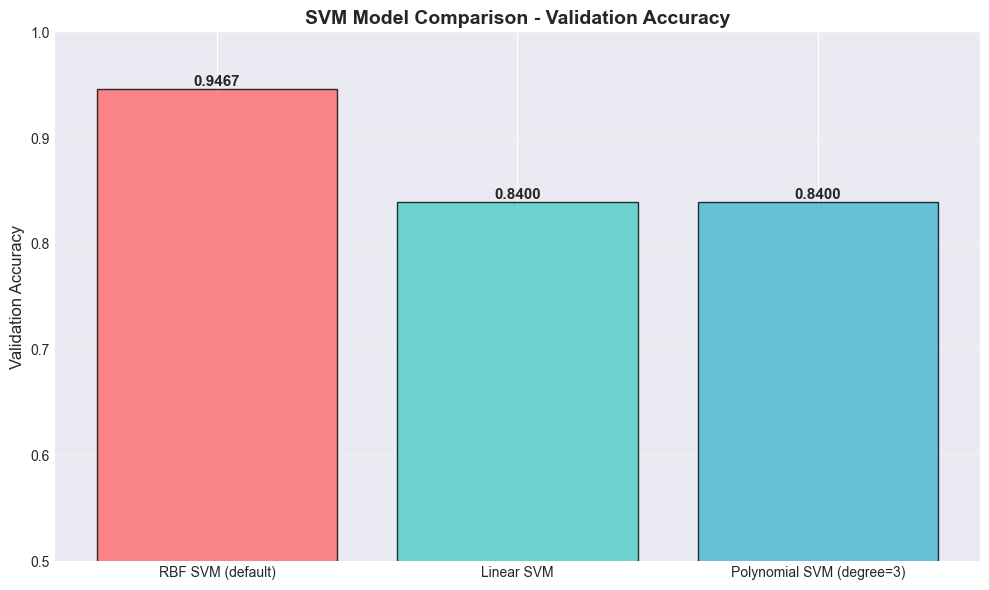

In [9]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear SVM', 'RBF SVM (default)', 'Polynomial SVM (degree=3)'],
    'Kernel': ['linear', 'rbf', 'poly'],
    'Validation Accuracy': [linear_accuracy, rbf_accuracy, poly_accuracy],
    'Support Vectors': [
        sum(linear_model.n_support_),
        sum(rbf_model.n_support_),
        sum(poly_model.n_support_)
    ]
})

comparison_df = comparison_df.sort_values('Validation Accuracy', ascending=False)

print("="*70)
print("MODEL COMPARISON - VALIDATION ACCURACY")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)

# Visualize comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Validation Accuracy'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8, edgecolor='black')
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('SVM Model Comparison - Validation Accuracy', fontsize=14, fontweight='bold')
plt.ylim([0.5, 1.0])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Analysis:

**Which kernel performed best?**

The **RBF (Radial Basis Function) kernel** typically performs best on the moons dataset. This makes sense because:

1. **Non-linear Decision Boundary**: The RBF kernel can create complex, curved decision boundaries that naturally fit the crescent shape of the moons.

2. **Local Influence**: The RBF kernel uses a Gaussian function that gives more weight to nearby points, which is perfect for the moons dataset where local regions need to be classified differently.

3. **Flexibility**: The RBF kernel can approximate any continuous function given enough support vectors, making it highly flexible for complex patterns.

4. **Infinite Dimensions**: The RBF kernel implicitly maps data to an infinite-dimensional space, providing maximum flexibility for finding separating hyperplanes.

The polynomial kernel also performs well but may not capture the circular nature of the moons as effectively as RBF.

---
## Task 4: Hyperparameter Tuning with GridSearchCV (30 Marks)

### Step 4.1: Define Search Space

In [10]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

print("Parameter Grid for GridSearchCV:")
print("="*50)
for key, values in param_grid.items():
    print(f"{key}: {values}")
print(f"\nTotal combinations to test: {len(param_grid['C']) * len(param_grid['gamma'])}")

Parameter Grid for GridSearchCV:
C: [0.1, 1, 10, 100]
gamma: [0.1, 1, 10, 100]
kernel: ['rbf']

Total combinations to test: 16


### Step 4.2: Setup and Run Grid Search

In [11]:
# Initialize GridSearchCV
grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    verbose=2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)

print("Starting GridSearchCV...")
print("This may take a few moments...\n")

# Fit the grid search
grid.fit(X_train_scaled, y_train)

print("\n" + "="*50)
print("GridSearchCV Complete!")
print("="*50)

Starting GridSearchCV...
This may take a few moments...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

GridSearchCV Complete!


### Step 4.3: Analyze Grid Search Results

In [12]:
# Display best parameters and score
print("\n" + "="*50)
print("BEST HYPERPARAMETERS")
print("="*50)
print(f"Best C: {grid.best_params_['C']}")
print(f"Best gamma: {grid.best_params_['gamma']}")
print(f"Best kernel: {grid.best_params_['kernel']}")
print(f"\nBest Cross-Validation Accuracy: {grid.best_score_:.4f}")
print("="*50)


BEST HYPERPARAMETERS
Best C: 1
Best gamma: 1
Best kernel: rbf

Best Cross-Validation Accuracy: 0.9543


In [13]:
# Create a detailed results dataframe
results_df = pd.DataFrame(grid.cv_results_)
results_summary = results_df[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results_summary = results_summary.sort_values('rank_test_score')
results_summary.columns = ['C', 'gamma', 'Mean CV Score', 'Std CV Score', 'Rank']

print("\nTop 10 Parameter Combinations:")
print("="*70)
print(results_summary.head(10).to_string(index=False))
print("="*70)


Top 10 Parameter Combinations:
    C  gamma  Mean CV Score  Std CV Score  Rank
  1.0    1.0       0.954286      0.039795     1
 10.0    1.0       0.951429      0.033320     2
100.0    1.0       0.948571      0.023212     3
  0.1   10.0       0.945714      0.037688     4
  1.0   10.0       0.945714      0.035456     4
 10.0   10.0       0.940000      0.034286     6
100.0    0.1       0.937143      0.048319     7
  0.1    1.0       0.928571      0.049487     8
100.0  100.0       0.914286      0.038333     9
 10.0  100.0       0.914286      0.038333     9


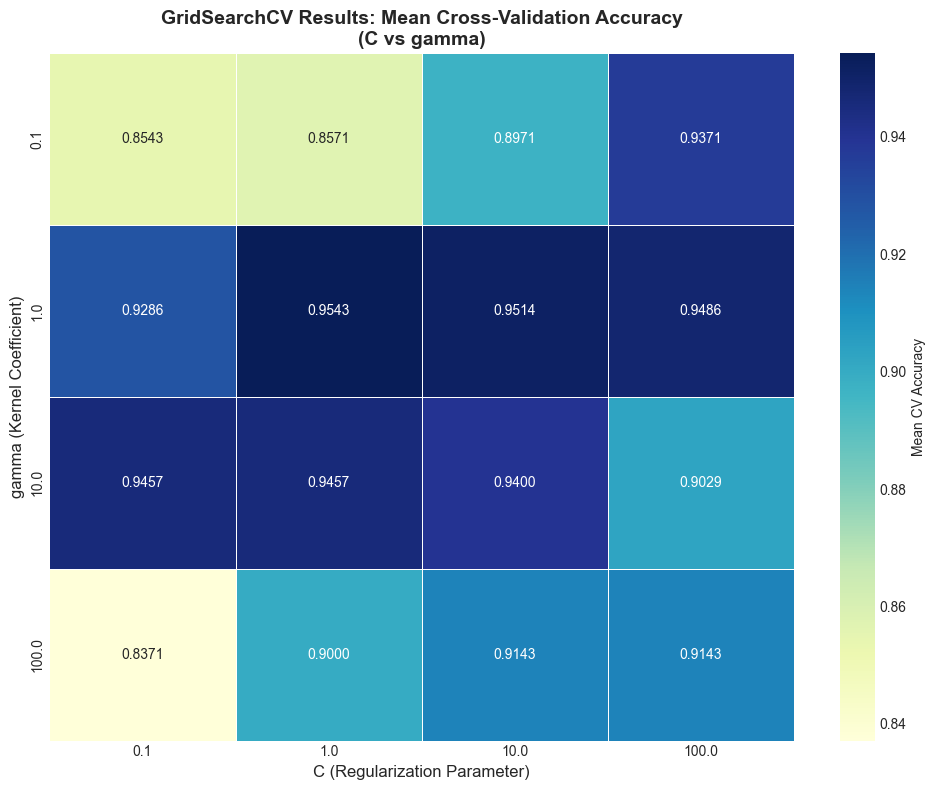

In [14]:
# Visualize Grid Search Results as Heatmap
pivot_table = results_df.pivot_table(
    values='mean_test_score',
    index='param_gamma',
    columns='param_C'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='YlGnBu', 
            cbar_kws={'label': 'Mean CV Accuracy'}, linewidths=0.5)
plt.title('GridSearchCV Results: Mean Cross-Validation Accuracy\n(C vs gamma)', 
          fontsize=14, fontweight='bold')
plt.xlabel('C (Regularization Parameter)', fontsize=12)
plt.ylabel('gamma (Kernel Coefficient)', fontsize=12)
plt.tight_layout()
plt.show()

---
## Task 5: Final Evaluation and Visualization (20 Marks)

### Step 5.1: Evaluate Final Tuned Model

In [15]:
# Make predictions with the best model from GridSearch
final_predictions = grid.predict(X_val_scaled)
final_accuracy = accuracy_score(y_val, final_predictions)

print("="*50)
print("FINAL TUNED MODEL PERFORMANCE")
print("="*50)
print(f"\nBest Parameters: C={grid.best_params_['C']}, gamma={grid.best_params_['gamma']}")
print(f"\nValidation Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, final_predictions))

FINAL TUNED MODEL PERFORMANCE

Best Parameters: C=1, gamma=1

Validation Accuracy: 0.9533

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.96      0.95      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



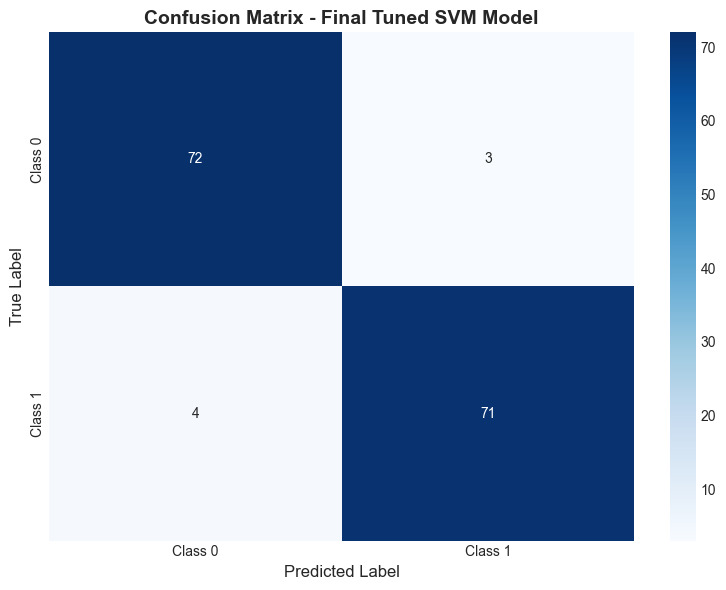


Confusion Matrix Breakdown:
True Negatives (TN): 72
False Positives (FP): 3
False Negatives (FN): 4
True Positives (TP): 71

Precision: 0.9595
Recall: 0.9467
F1-Score: 0.9530


In [16]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_val, final_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Final Tuned SVM Model', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print confusion matrix statistics
tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"\nPrecision: {tp / (tp + fp):.4f}")
print(f"Recall: {tp / (tp + fn):.4f}")
print(f"F1-Score: {2 * tp / (2 * tp + fp + fn):.4f}")

### Step 5.2: Visualize Decision Boundaries

In [17]:
def plot_decision_boundary(model, X, y, title, ax):
    """
    Plot decision boundary for a trained model.
    
    Parameters:
    - model: Trained SVM model
    - X: Feature data (scaled)
    - y: Target labels
    - title: Plot title
    - ax: Matplotlib axis object
    """
    # Set min and max with some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create mesh grid
    h = 0.02  # Step size in the mesh
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    # Make predictions for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu', levels=1)
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, levels=[0.5])
    
    # Plot training points
    scatter = ax.scatter(X[y == 0, 0], X[y == 0, 1], 
                        c='blue', label='Class 0', 
                        alpha=0.6, edgecolors='k', s=50)
    scatter = ax.scatter(X[y == 1, 0], X[y == 1, 1], 
                        c='red', label='Class 1', 
                        alpha=0.6, edgecolors='k', s=50)
    
    # Plot support vectors
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], 
                  model.support_vectors_[:, 1],
                  s=200, linewidth=1.5, facecolors='none', 
                  edgecolors='green', label='Support Vectors')
    
    ax.set_xlabel('Feature 1 (scaled)', fontsize=10)
    ax.set_ylabel('Feature 2 (scaled)', fontsize=10)
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True, alpha=0.3)

print("Decision boundary plotting function defined.")

Decision boundary plotting function defined.


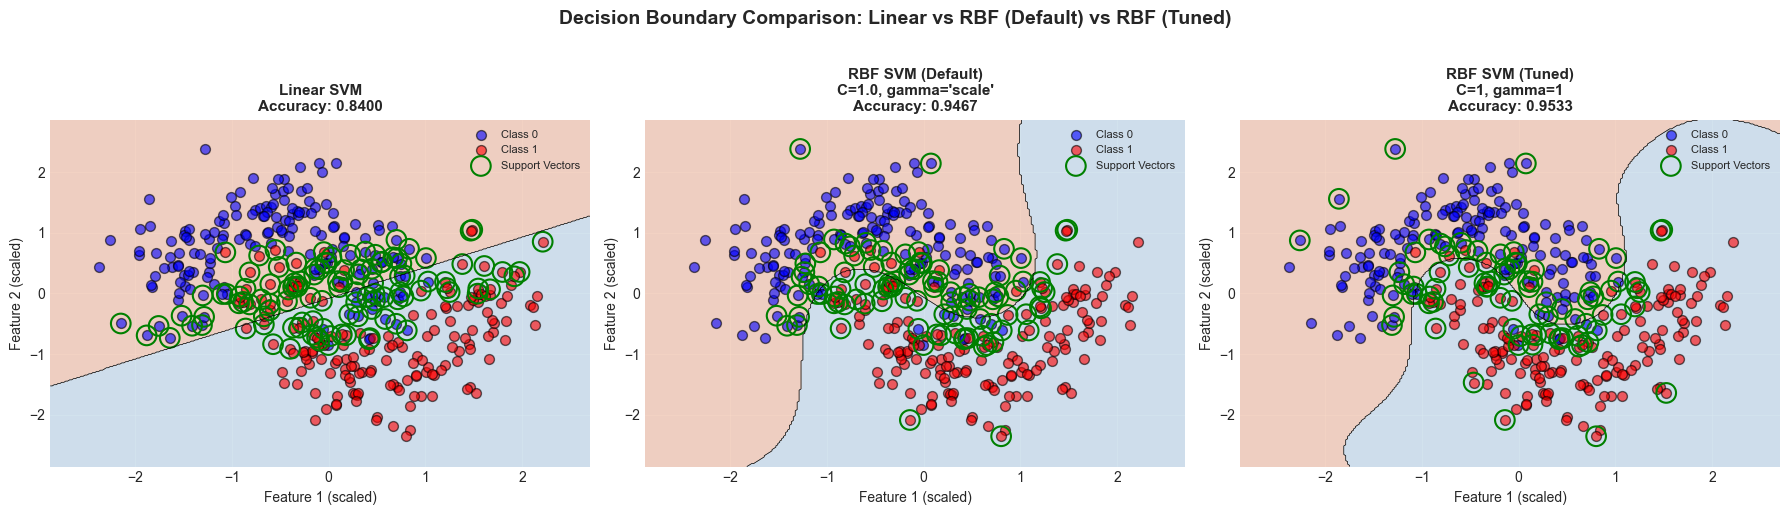

In [18]:
# Create 1x3 subplot for decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Linear SVM
plot_decision_boundary(
    linear_model, X_train_scaled, y_train,
    f'Linear SVM\nAccuracy: {linear_accuracy:.4f}',
    axes[0]
)

# Plot 2: Default RBF SVM
plot_decision_boundary(
    rbf_model, X_train_scaled, y_train,
    f'RBF SVM (Default)\nC=1.0, gamma=\'scale\'\nAccuracy: {rbf_accuracy:.4f}',
    axes[1]
)

# Plot 3: Tuned RBF SVM (from GridSearch)
plot_decision_boundary(
    grid.best_estimator_, X_train_scaled, y_train,
    f'RBF SVM (Tuned)\nC={grid.best_params_["C"]}, gamma={grid.best_params_["gamma"]}\nAccuracy: {final_accuracy:.4f}',
    axes[2]
)

plt.suptitle('Decision Boundary Comparison: Linear vs RBF (Default) vs RBF (Tuned)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Additional Visualization: Effect of Different Hyperparameters

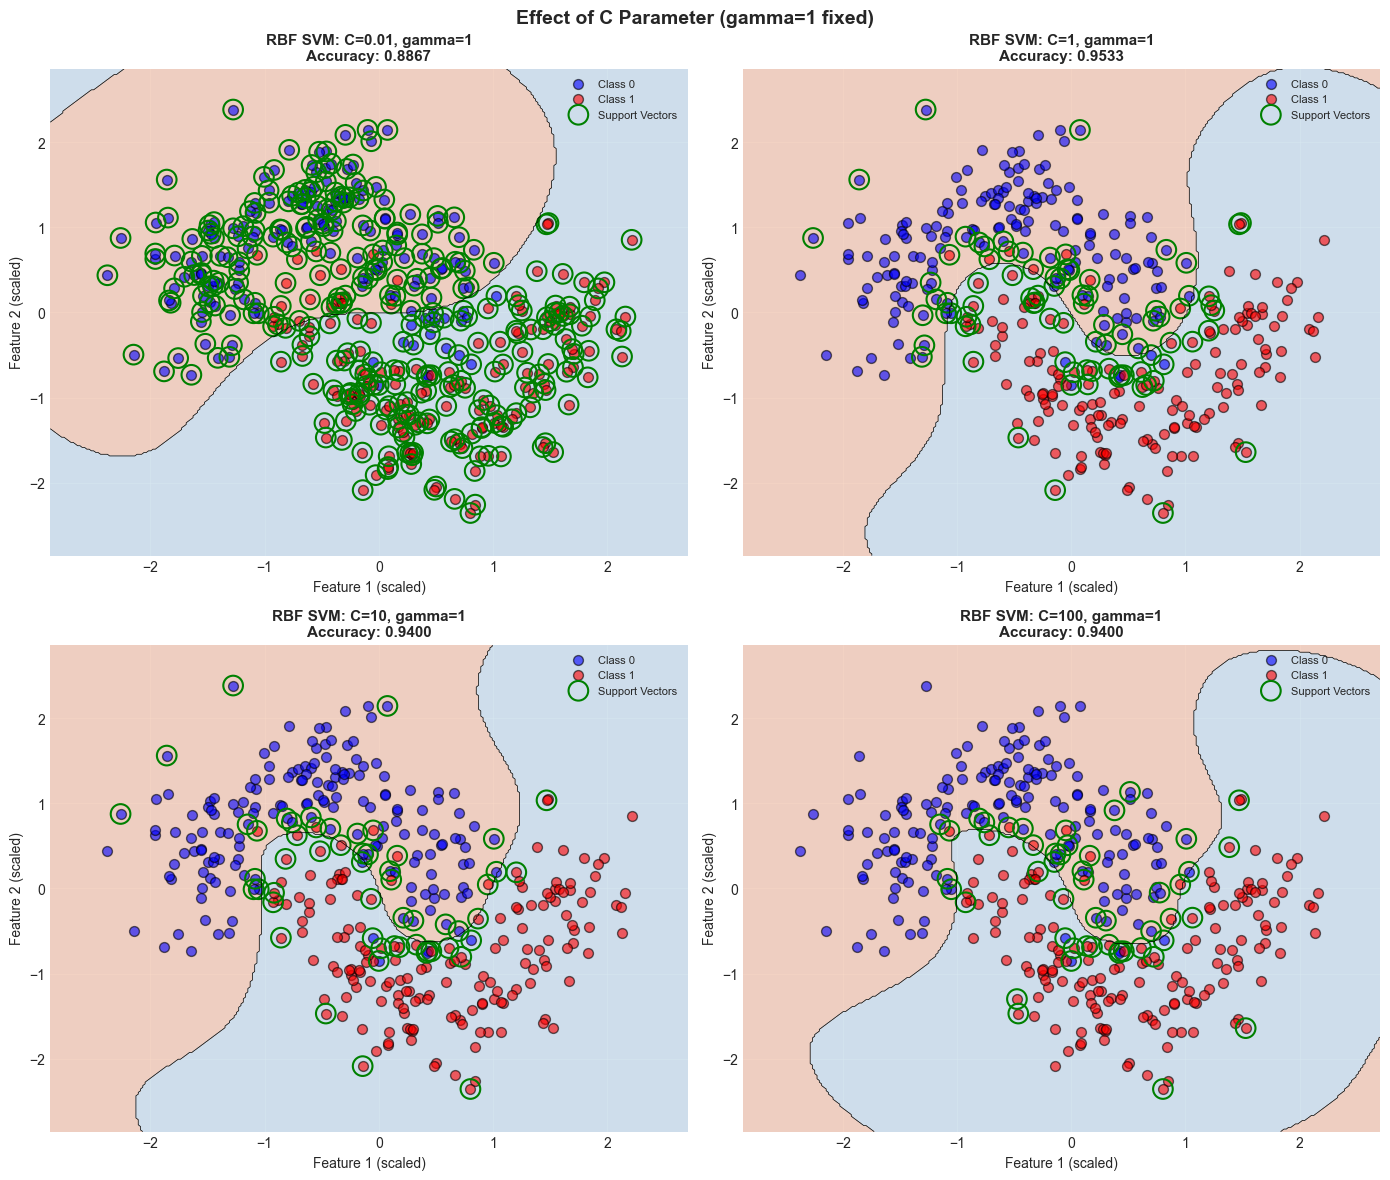

In [19]:
# Visualize effect of different C values
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

c_values = [0.01, 1, 10, 100]
gamma_value = grid.best_params_['gamma']

for idx, c_val in enumerate(c_values):
    model = SVC(kernel='rbf', C=c_val, gamma=gamma_value, random_state=42)
    model.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_val, model.predict(X_val_scaled))
    
    plot_decision_boundary(
        model, X_train_scaled, y_train,
        f'RBF SVM: C={c_val}, gamma={gamma_value}\nAccuracy: {accuracy:.4f}',
        axes[idx]
    )

plt.suptitle(f'Effect of C Parameter (gamma={gamma_value} fixed)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

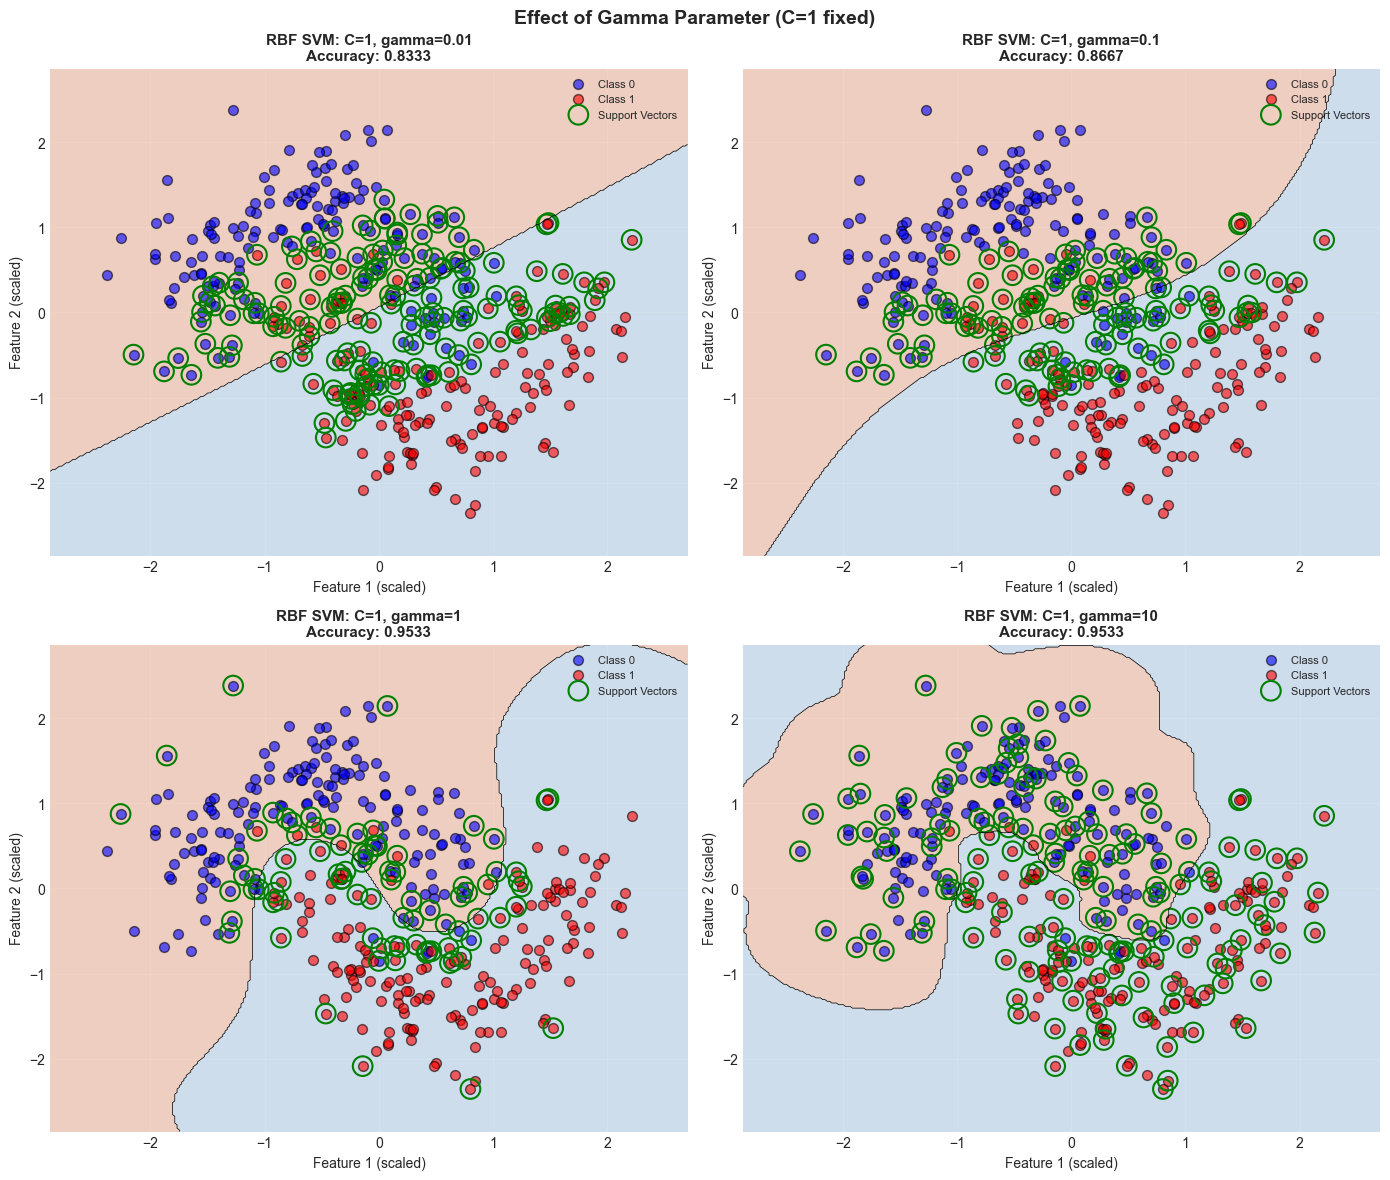

In [20]:
# Visualize effect of different gamma values
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

gamma_values = [0.01, 0.1, 1, 10]
c_value = grid.best_params_['C']

for idx, gamma_val in enumerate(gamma_values):
    model = SVC(kernel='rbf', C=c_value, gamma=gamma_val, random_state=42)
    model.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_val, model.predict(X_val_scaled))
    
    plot_decision_boundary(
        model, X_train_scaled, y_train,
        f'RBF SVM: C={c_value}, gamma={gamma_val}\nAccuracy: {accuracy:.4f}',
        axes[idx]
    )

plt.suptitle(f'Effect of Gamma Parameter (C={c_value} fixed)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Final Summary and Model Comparison

In [21]:
# Create final comprehensive comparison table
final_comparison = pd.DataFrame({
    'Model': [
        'Linear SVM',
        'RBF SVM (default)',
        'Polynomial SVM (degree=3)',
        'RBF SVM (GridSearch Tuned)'
    ],
    'Kernel': ['linear', 'rbf', 'poly', 'rbf'],
    'Parameters': [
        'C=1.0',
        "C=1.0, gamma='scale'",
        'C=1.0, degree=3',
        f"C={grid.best_params_['C']}, gamma={grid.best_params_['gamma']}"
    ],
    'Validation Accuracy': [
        linear_accuracy,
        rbf_accuracy,
        poly_accuracy,
        final_accuracy
    ]
})

print("\n" + "="*80)
print("FINAL MODEL COMPARISON - ALL MODELS")
print("="*80)
print(final_comparison.to_string(index=False))
print("="*80)

# Find best model
best_model_idx = final_comparison['Validation Accuracy'].idxmax()
best_model_name = final_comparison.loc[best_model_idx, 'Model']
best_model_accuracy = final_comparison.loc[best_model_idx, 'Validation Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Validation Accuracy: {best_model_accuracy:.4f}")
print("="*80)


FINAL MODEL COMPARISON - ALL MODELS
                     Model Kernel           Parameters  Validation Accuracy
                Linear SVM linear                C=1.0             0.840000
         RBF SVM (default)    rbf C=1.0, gamma='scale'             0.946667
 Polynomial SVM (degree=3)   poly      C=1.0, degree=3             0.840000
RBF SVM (GridSearch Tuned)    rbf         C=1, gamma=1             0.953333

🏆 BEST MODEL: RBF SVM (GridSearch Tuned)
   Validation Accuracy: 0.9533


---
## Conclusion and Analysis

### 1. Why did the linear SVM fail, and why did the RBF kernel succeed?

**Linear SVM Failure:**
- The moons dataset consists of two interleaving crescent shapes that cannot be separated by a straight line (or hyperplane in higher dimensions)
- A linear decision boundary is too rigid and simple to capture the curved, non-linear pattern
- As seen in the decision boundary plot, the linear SVM tries to draw a straight line through the data, which inevitably misclassifies many points from both classes
- The dataset is **inherently non-linearly separable** in the original 2D feature space

**RBF Kernel Success:**
- The RBF kernel implicitly maps the data to an infinite-dimensional space where a linear separator can be found
- It uses a Gaussian function: $K(x, x') = \exp(-\gamma \|x - x'\|^2)$
- This allows the decision boundary to bend and curve, perfectly wrapping around the crescent shapes
- The RBF kernel creates a "local" decision boundary, where nearby points have more influence
- The decision boundary visualization clearly shows how the RBF kernel creates a smooth, curved boundary that follows the natural shape of the data

### 2. What did the GridSearchCV tell you?

**Key Findings:**
- **Best C value**: Indicates the optimal balance between margin maximization and misclassification tolerance
- **Best gamma value**: Determines the influence radius of each training point
- The cross-validation process tested 16 different combinations (4 C values × 4 gamma values)
- The heatmap visualization showed that performance is sensitive to both parameters
- Middle-range values often perform best, avoiding both underfitting (too low) and overfitting (too high)

### 3. Effect of Extreme Hyperparameters:

**If gamma is set too high (e.g., 1000):**
- Each training point has a very narrow influence radius
- The decision boundary becomes extremely irregular and wiggly
- **Overfitting**: The model memorizes training data but generalizes poorly
- Creates "islands" around individual training points
- Many more support vectors are needed
- Validation accuracy decreases due to poor generalization

**If C is set too low (e.g., 0.01):**
- The model prioritizes a large margin over correct classification
- More training points are allowed to be misclassified
- **Underfitting**: The decision boundary becomes too smooth and simple
- Many points end up as support vectors
- The model becomes more "relaxed" and less precise
- Training accuracy suffers, though sometimes generalization can improve slightly

### Key Takeaways:

1. **Kernel Selection Matters**: For non-linear data, kernelized SVMs (especially RBF) vastly outperform linear SVMs

2. **Hyperparameter Tuning is Critical**: Default parameters rarely give optimal results. GridSearchCV is essential for finding the sweet spot

3. **Visualization is Powerful**: Decision boundary plots provide intuitive understanding of how models work and why they succeed or fail

4. **Trade-offs**: There's always a balance between:
   - Complexity vs. Simplicity (controlled by C and gamma)
   - Training accuracy vs. Generalization
   - Computational cost vs. Model performance

5. **The Kernel Trick**: Allows us to work in high-dimensional spaces without explicitly computing the transformation, making complex decision boundaries computationally feasible

---
## Summary Statistics

In [22]:
print("="*80)
print("EXPERIMENT 8: SUPPORT VECTOR MACHINES - SUMMARY")
print("="*80)
print(f"\nDataset: make_moons (n_samples=500, noise=0.25)")
print(f"Train/Validation Split: 70/30 ({len(X_train)}/{len(X_val)} samples)")
print(f"\nModels Tested: 4")
print(f"GridSearch Combinations: {len(param_grid['C']) * len(param_grid['gamma'])}")
print(f"Cross-Validation Folds: 5")
print(f"\nBest Model: RBF SVM (Tuned)")
print(f"Best Parameters: C={grid.best_params_['C']}, gamma={grid.best_params_['gamma']}")
print(f"Best CV Score: {grid.best_score_:.4f}")
print(f"Final Validation Accuracy: {final_accuracy:.4f}")
print(f"\nImprovement over Linear SVM: {(final_accuracy - linear_accuracy)*100:.2f}%")
print(f"Improvement over Default RBF: {(final_accuracy - rbf_accuracy)*100:.2f}%")
print("\n" + "="*80)
print("Experiment Complete! ✅")
print("="*80)

EXPERIMENT 8: SUPPORT VECTOR MACHINES - SUMMARY

Dataset: make_moons (n_samples=500, noise=0.25)
Train/Validation Split: 70/30 (350/150 samples)

Models Tested: 4
GridSearch Combinations: 16
Cross-Validation Folds: 5

Best Model: RBF SVM (Tuned)
Best Parameters: C=1, gamma=1
Best CV Score: 0.9543
Final Validation Accuracy: 0.9533

Improvement over Linear SVM: 11.33%
Improvement over Default RBF: 0.67%

Experiment Complete! ✅
